<a href="https://colab.research.google.com/github/Lucena-Marcos/Analise_Acoes/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# get the sock quote
# novo modo de retirar historico de ações diretamente do yahoo
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-01')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [5]:
# get the number of rowns e columns in the data set
# confere com a informação acima
df.shape

(2265, 6)

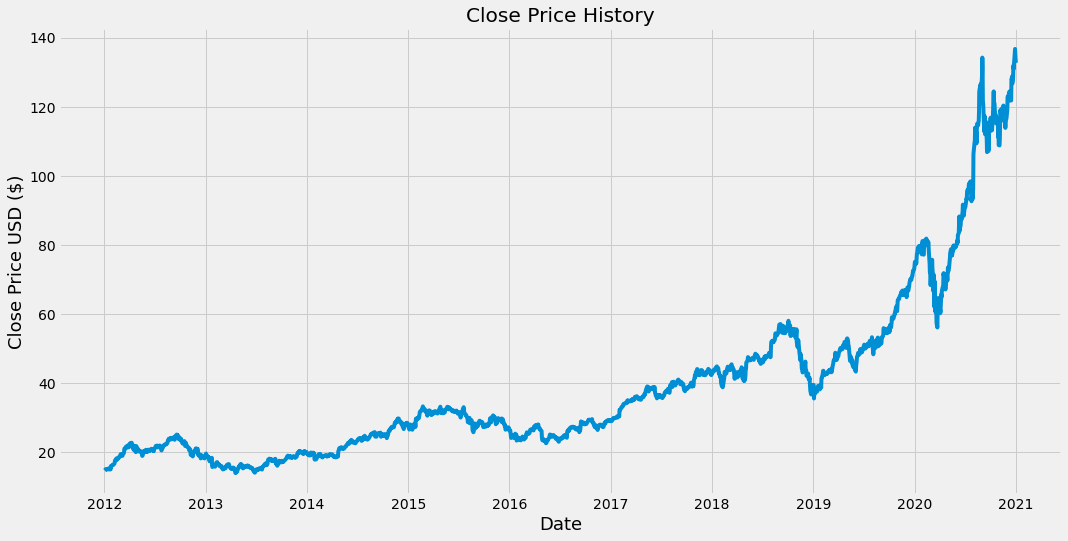

In [6]:
# Visualize the closing price history
# grafico pelo matplotlib

# definindo o tamanho do grafico
plt.figure(figsize=(16,8))
# definindo o titulo
plt.title("Close Price History")
# pedindo para plotar as indormações de fechamento
plt.plot(df['Close'])
# definindo o texto abaixo do grafico e seu tamanho
plt.xlabel("Date", fontsize=18)
# definindo o texto no angulo y e seu tamanho
plt.ylabel('Close Price USD ($)', fontsize=18)
# mostrar o grafico
plt.show()